<a href="https://colab.research.google.com/github/carlirom/DigitsRecognition/blob/main/An%C3%A1lisis_de_Discurso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Speech to text de un video de discurso de Evo morales en youtube

In [1]:
#instalación de librería
!pip install youtube-transcript-api

[Video seleccionado](https://www.youtube.com/watch?v=ZXNFMtlakHo&t=3026s)

Creamos archivo txt con todo el discurso extraído de youtube de los subtítulos del video

In [17]:
from youtube_transcript_api import YouTubeTranscriptApi

text = YouTubeTranscriptApi.get_transcript("ZXNFMtlakHo", languages=['es'])
file = open("discurso.txt", "w")
for words in text:
  print(words['text'])
  file.write(words['text'] + '\n')

y aquí está con nosotros nuestro hermano
presidente evo morales ayma
[Música]
arroyo es la cuna
es nuestro ser cool
nuestra madre y nuestro hogar
gracias
que viva bolivia
o
ya viva argentina
es que viva nuestra patria grande
[Aplausos]
muchas gracias hermana sierva 2
una enorme alegría
estar acá
para despegar
14 años de nuestra revolución
democrática cultural
14 años
de nuestro estado plurinacional de
bolivia
hermanas y hermanos
desde argentina
un saludo
a la deriva de los presentes acá
hermanas y hermanos bolivianos
hermanas y hermanos de argentinos
autoridades
pero también desde argentina
saluda saludamos al pueblo de bolivia
a nuestras autoridades municipales
departamentales nacionales
a nuestros movimientos sociales
todos los distintos sectores de regiones
del país
a nuestras ex autoridades a nuestros ex
dirigentes
pero sabía un saludo especial a quienes
en las últimas semanas dieron dura
resistencia al golpismo de la derecha
boliviana
expresar mi respeto mi admiración
a todavía to

2. Creamos la imagen de palabras más usadas con wordcloud

In [40]:
!pip install wordcloud

In [41]:
file = open("discurso.txt", "r")
bigList = []
for line in file:
  lineList = line.split(" ")
  for word in lineList:
    print(word)
    if word != " " and word != "\n":
      bigList.append(word)


Se truncaron las últimas líneas 5000 del resultado de transmisión.
hermanos

las
grandes
luchas
de
tiempo
de
colonia

nos
dejaron
una
ideología

dante
color
ya
lista
ahora

antiimperalista
y
quiero
decir
a
ustedes

aquí
en
argentina
del
gym
argentina
para

todo
el
mundo
jamás
claudicar
ante
el

enemigo
el
capitalismo
no
garantiza
la

esperanza
de
las
futuras
generaciones
el

capitalismo
es
el
peor
enemigo
de
la

humanidad
una
costa
de
propiedad
privada

todo
tenemos
propiedad
privada
que
no
es

aquel
que
contenta

los
recursos
económicos
en
pocas
manos

esa
es
nuestra
profunda
diferencia

hermanas
y
hermanos
hicimos
después

después
de
pensar
un
movimiento
político

de
liberación
un
proyecto
político
del

pueblo
qom
programa

de
colo
perfectamente
con
el
valor

álvaro
garcía
linera
nos
planteamos
cuál

es
el
programa
en
lo
político

la
refundación
de
bolivia
el
económico

la
nacionalización
de
los
recursos

naturales
y
en
lo
social
la

redistribución
de
la
riqueza
así
resumió

nuestra


(-0.5, 399.5, 199.5, -0.5)

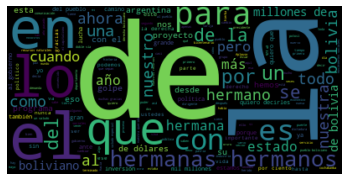

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file = open('discurso.txt').read()
wordcloud = WordCloud().generate(file)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

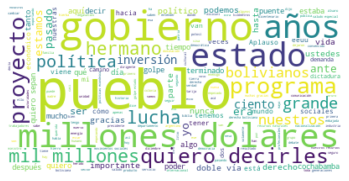

In [87]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

file = open('discurso.txt').read()
wordcloud = WordCloud().generate(file)
stopwords = STOPWORDS 
stopwords.update([ "de", "la","el","para","es","lo","con","al","una","se","su","esta","con","en","que","los","por","un","del","pero","eso","más","ya","va","sin","si","este","gran","nos","las","hermanos","todo","como","cuando","bolivia","hermanas","ahora","nuestra","desde","nuestro","hemos","año","todos","boliviano","quiero decirles","también", "porque","argentina"])
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(file)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('wc.png')